In [17]:
%pip install albumentations==0.4.6
%pip install  torch_lr_finder
%pip install torch
%pip install grad-cam
%pip install easydict


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
import easydict
args = easydict.EasyDict({
        "batchsize": 512,
        "epoch": 20,
        "gpu": 1,
        "out": "result",
        "resume": False,
        "unit": 1000,
        "device":'cpu'
})

In [20]:
from utils.transforms import get_a_train_transform,get_a_test_transform
from utils.dataloader import Cifar10SearchDataset,get_loader
batch_size = 512
use_cuda=True
train_loader, test_loader = get_loader(get_a_train_transform(), get_a_test_transform(), batch_size=batch_size, use_cuda=use_cuda)


print(get_a_train_transform())

print(get_a_test_transform())

print(train_loader)
print('length of train_loader',len(train_loader))
print(test_loader)
print('length of test_loader',len(test_loader))

Files already downloaded and verified
Files already downloaded and verified
Compose([
  Normalize(always_apply=True, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616), max_pixel_value=255.0),
  HorizontalFlip(always_apply=False, p=0.5),
  PadIfNeeded(always_apply=False, p=1.0, min_height=36, min_width=36, border_mode=4, value=None, mask_value=None),
  RandomCrop(always_apply=False, p=1.0, height=32, width=32),
  CoarseDropout(always_apply=False, p=0.5, max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
Compose([
  Normalize(always_apply=True, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
length of train_loader 98
length of test_loader 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

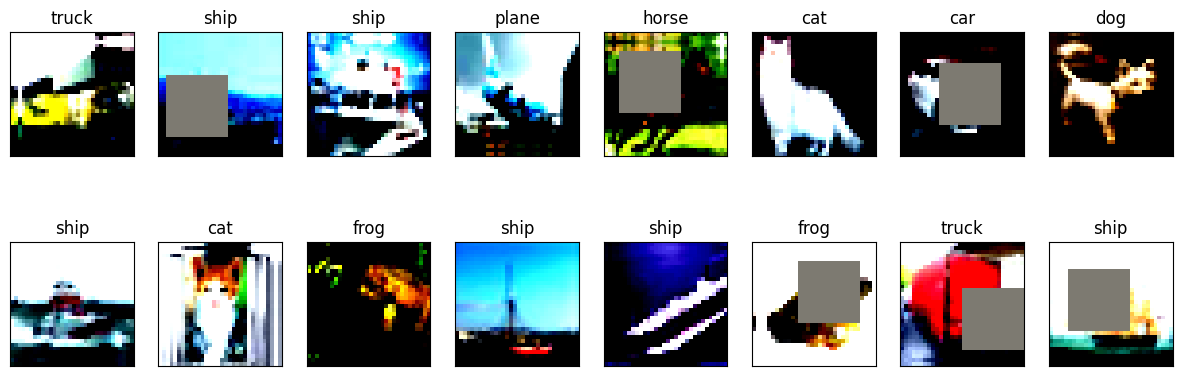

In [21]:
from utils.visualize import  print_samples

print_samples(train_loader)

In [22]:
%pip install torchsummary
from torchsummary import summary
from models.resnet import ResNet18
from utils.summary import model_summary
from main import train_model,test_model


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu") 
print(device)



model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

Note: you may need to restart the kernel to use updated packages.
cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [28]:

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torch_lr_finder import LRFinder

model =  ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

lr_finder = LRFinder(model, optimizer, criterion, device="cpu")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph

min_loss = min(lr_finder.history["loss"])
max_lr = lr_finder.history["lr"][np.argmin(lr_finder.history["loss"], axis=0)]

print("Min Loss = {}, Max LR = {}".format(min_loss, max_lr))

    # Reset the model and optimizer to initial state
lr_finder.reset()


  2%|▎         | 5/200 [03:38<1:57:30, 36.16s/it]

In [ ]:
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 20
learning_rate=[]
scheduler = OneCycleLR(
        optimizer,
        max_lr=1.59E-03,
        steps_per_epoch=1,
        epochs=22,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )


for epoch in range(EPOCHS):
    scheduler.step()
    print("EPOCH:", epoch)
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_model(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test_model(model, device, test_loader)


    learning_rate.append(param_group['lr']),

In [ ]:
import imageio
import cv2
from utils.misclassified import wrong_predictions,plot_misclassified
wrong_predictions(model,test_loader, device)

In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image,preprocess_image
from torchvision.models import resnet18
import torchvision.models as models
import argparse

In [ ]:
weights=models.resnet18(weights='ResNet18_Weights.DEFAULT')
model = resnet18(pretrained=weights)
target_layers = [model.layer4[-1]]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20, 20))

for i in range(1,10):
    img = mpimg.imread(f'/content/incorrect_image_{i}.jpg')
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    fig.add_subplot(5, 4, i)
    plt.imshow(img)
    plt.title(classes[i])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20, 20))

for i in range(1,10):
    img = mpimg.imread(f'/content/incorrect_image_{i}.jpg')
    img = cv2.resize(img, (224, 224))
    img = np.float32(img) / 255
    input_tensor = preprocess_image(img, mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
    cam = GradCAM(model=model, target_layers=target_layers, use_cuda='cuda')
    #targets = [ClassifierOutputTarget(281)]
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)
    grayscale_cam = grayscale_cam[0]
    visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    image = visualization
    fig.add_subplot(5, 4, i)
    plt.imshow(image)
    plt.title(classes[i])

plt.show()
